<h1>TP2 Deep Learning - CNN</h1>

This lab aims at discovering CNNs

* back to MNIST
* first convolutional arhitecture
* filters visualization
* using VGG16, a pretrained model
* filter visualization by maximizing activations
* data augmentation



Authors: Thierry Artières, Stephane Ayache, Ronan Sicre -
Equipe [QARMA](https://qarma.lis-lab.fr/) du [LIS](https://www.lis-lab.fr/)  

---



https://keras.io/api/

Import necessary packages :

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
print(keras.__version__)

3.6.0


<h2> Loading data</h2>

Here we load the MNIST dataset (written digits)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28
num_classes = 10
nb_samples = len(x_train)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)# (batch, rows, cols, channel)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)  # shape of a single input
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

MNIST datast contains 60000 exemples spread over 10 classes. We randomly sample few data to fasten the processes.

In [3]:
l_idx = list(range(nb_samples))
np.random.shuffle(l_idx)
l_idx = l_idx[:10000]

x_train, y_train = x_train[l_idx], y_train[l_idx]


We reshape the labels as <i>one-hot vectors</i> of size num_classes. These vectors contain 0 and a single 1 at the index of the corresponding class.

In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)


(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 10)
(10000, 10)


<h3>"Dense" network</h3>

We take a dense model as baseline.
Note the number of parameters and performance.

In [5]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

loss = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[], verbose=1)

score = model.evaluate(x_test, y_test, verbose=0)
print("score=", score)

c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 937,482 (3.58 MB)

 Trainable params: 937,482 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6843 - loss: 1.0056 - val_accuracy: 0.9010 - val_loss: 0.3258
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9113 - loss: 0.2967 - val_accuracy: 0.9370 - val_loss: 0.2221
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9336 - loss: 0.2056 - val_accuracy: 0.9380 - val_loss: 0.1940
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9494 - loss: 0.1531 - val_accuracy: 0.9500 - val_loss: 0.1680
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9616 - loss: 0.1219 - val_accuracy: 0.9480 - val_loss: 0.1722
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9695 - loss: 0.0983 - val_accuracy: 0.9530 - val_loss: 0.1565
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9763 - loss: 0.0830 - val_accuracy: 0.9560 - val_loss: 0.1704
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9766 - loss: 0.0719 - val_accuracy: 0.951

<h3>First convolutional architecture</h3>

We replace all dense layers but the last one by convolutional ones. The Conv2D layers are followed by max pooling: MaxPooling2D. We do not flatten the input data as we use 2D inputs, but the last Dense layer expect a 1D input thus we use the flatten there.

In [6]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model2.summary())

c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,634 (916.54 KB)

 Trainable params: 234,634 (916.54 KB)

 Non-trainable params: 0 (0.00 B)

None


<b>TO DO :</b> Explain the number of parameters of each layer

<h4>Entrainement du réseau :</h4>

Call the "fit" function to train our model. Then evaluate it. You can visualize the training curves.

# Expliquer le nombre de paramètre de chaque couche:

L'input est de 28*28*1 = 784

1. Conv2d
nbre parametres: (28-2)*64 = 1664 (-2 pour le padding)

2. Conv2d_1
nbre de paramètres 128 * (64 * (3*3) + 1) == 73856

3. COnv2d_2
nbre de paramètres 147584 = 128 * (128 * (3*3) + 1)

4. Dense
nbre de paramètres 10*(1152+1)


In [7]:
loss = model2.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[], verbose=1)

score = model2.evaluate(x_test, y_test, verbose=0)
print("score=", score)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.5456 - loss: 1.3527 - val_accuracy: 0.9460 - val_loss: 0.1977
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9436 - loss: 0.1844 - val_accuracy: 0.9680 - val_loss: 0.1086
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9681 - loss: 0.1167 - val_accuracy: 0.9670 - val_loss: 0.1070
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9741 - loss: 0.0837 - val_accuracy: 0.9780 - val_loss: 0.0720
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.9800 - loss: 0.0690 - val_accuracy: 0.9740 - val_loss: 0.0722
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 26s 283ms/step - accuracy: 0.9840 - loss: 0.0489 - val_accuracy: 0.9790 - val_loss: 0.0632
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - accuracy: 0.9872 - loss: 0.0462 - val_accuracy: 0.9830 - val_loss: 0.0493
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.9898 - loss: 0.0387 - val_accuracy: 0.

<b>TO DO :</b> play with the architecture

Vary the number of layers

reduce the number of filters

remove max pooling and change the stride to 2

Observe performance changes.

<h1>Autoencoder</h1>


* See the following examples coming from: https://blog.keras.io/building-autoencoders-in-keras.html

In [9]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K

encoded_dim = 128

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Flatten()(x)
encoded = Dense(encoded_dim)(x)
x = Dense(128)(encoded)
x = Reshape((4,4,8))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

encoder = Model(input_img, encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

print(encoder.summary())
print(autoencoder.summary())




Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,416 (71.94 KB)

 Trainable params: 18,416 (71.94 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,409 (146.13 KB)

 Trainable params: 37,409 (146.13 KB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=128,shuffle=True,validation_data=(x_test, x_test))


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.1410 - val_loss: 0.0676
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0639 - val_loss: 0.0532
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0491 - val_loss: 0.0396
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0386 - val_loss: 0.0343
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0338 - val_loss: 0.0310
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0305 - val_loss: 0.0284
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0282 - val_loss: 0.0265
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0261 - val_loss: 0.0260
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0247 - val_loss: 0.0236
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0235 - val_loss: 0.0226


<b>TO DO :</b>

Explain the architecture, particularly the decoder.

Display an input image and its reconstruction.

modify the architecture to project dat into a 2 dimensional latent space.

Display an input image and its reconstruction again.

Plot a part of the dataset in 2D



In [11]:
from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
from keras import backend as K
%matplotlib inline

label :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


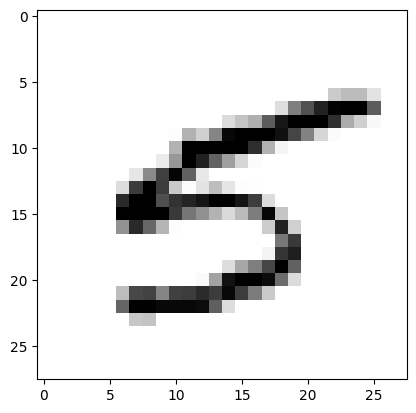

In [12]:
i = 2

pl.imshow(x_train[i, :,: ,0], interpolation='nearest', cmap=cm.binary)
print("label : ", y_train[i,:])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step
label :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


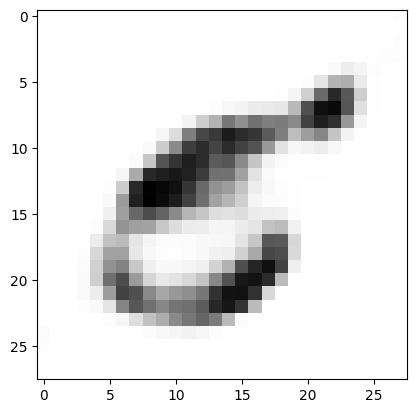

In [13]:
activations = encoder.predict(x_train)
reconstructions = autoencoder.predict(x_train)

i = 2

pl.imshow(reconstructions[i, :,: ,0], interpolation='nearest', cmap=cm.binary)

print("label : ", y_train[i,:])

### Explication de l'architecture:
Nous avons ici 2 modèles un encodeur et un décodeur. L'encodeur est composé de 3 couches de convolution et de pooling. Le décodeur est composé de 3 couches de convolution et de upsampling ce qui permet de reconstruire l'image flatten en entrée.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1000, 128)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.084s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.080781


c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.484360
[t-SNE] KL divergence after 300 iterations: 1.099919


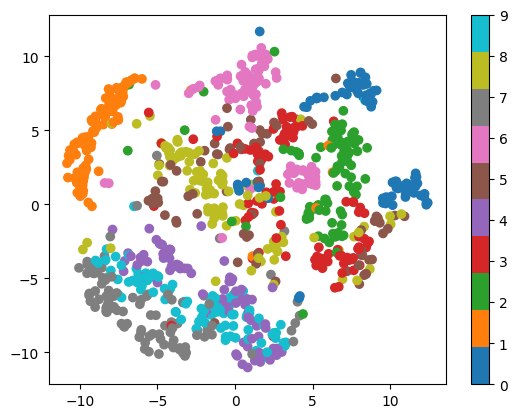

In [31]:
#plot a part of the dataset in 2d
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

activations = encoder.predict(x_train)
activations = activations.reshape(activations.shape[0], -1)
print(activations.shape)
activations = activations[:1000]
y_train = y_train[:1000]
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(activations)

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=np.argmax(y_train, axis=1), cmap='tab10')
plt.colorbar()
plt.show()


<h1>Filters Visualization</h1>

a filter activation or featume map of a convolutional layer corresponds to the output of such layer. Their content depends on the input of the network.

A layer defined with 64 conv. filters , generate 64 maps

We use matplotlib to display an array of images


In [14]:
import matplotlib.pyplot as plt
def show_images(images, cols = 1):

    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, int(np.ceil(n_images/float(cols))), n + 1)
        plt.axis('off')
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)


A simple method to obtain these maps is with Keras  is to foward an image (with the proper size) to a truncated model.
We cut the model where we want to obtain the feature maps.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
-0.0 1.0527136 (1, 28, 28, 64)


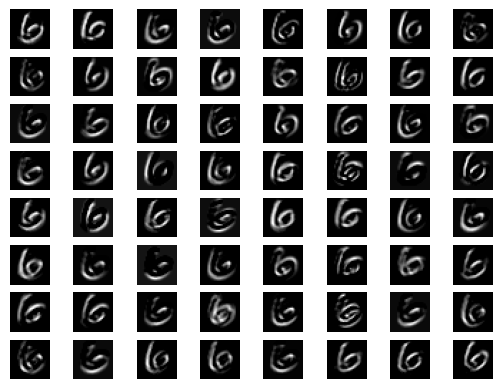

In [15]:
from keras.models import Model

# Définition d'un modèle via la "graph" API de Keras
model_tmp = Model(model2.layers[0].input, model2.layers[0].output)

# Cartes réponses de x_test[10] (un '0')
feature_maps = model_tmp.predict(np.expand_dims(x_test[11], 0))

# normalisation des valeurs entre 0 et 1
minimum, maximum = np.min(feature_maps), np.max(feature_maps)
feature_maps = (feature_maps - minimum) / (maximum - minimum)

print(minimum, maximum, feature_maps.shape)

from PIL import Image
from IPython.display import display

images = []
for i in range(64):
  images.append(np.array(255*feature_maps[:,:,:,i]).reshape(28,28).astype('uint8'))

show_images(images,8)

The images obtained are from the filter in first layer and show that these filters learned on the first layer detect orientations and contours.



<h4> Filters visualization</h4>

Visualizing filters from the first layer is simple because filters have as many channels as the input, so filters are on the same domain as data.



In [27]:
# Récupère tous les paramètres appris par le réseau
weights = model2.get_weights()

for w in weights: print(w.shape)

print(model2.summary())

(5, 5, 1, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(1152, 10)
(10,)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 703,904 (2.69 MB)

 Trainable params: 234,634 (916.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 469,270 (1.79 MB)

None


<b> TO DO : </b> what do the 2 previous lines do ?

Display the filters of the first conv. layer.


les 2 dernieres lignes permettent de respectivement récuper les poids de toutes les couches et d'afficher les poids par couche

-0.2529882 0.1881063


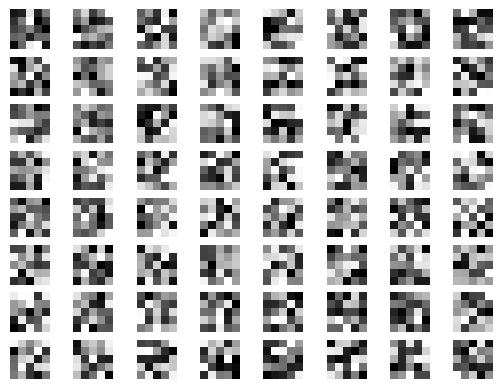

In [17]:
# normalize values between 0 and 1
minimum, maximum = np.min(weights[0]), np.max(weights[0])
weights0 = (weights[0] - minimum) / (maximum - minimum)

print(minimum, maximum)
# entre 0 et 255 pour l'affichage
weights0 *= 255.

images = []
for i in range(64):
  images.append(np.array(255*weights0[:,:,:,i]).reshape(5,5).astype('uint8'))

show_images(images, 8)

<h3> CNN for natural images </h3>

let's look at a deeper model for natural image classification (VGG16 pre-trained on ImageNet).


In [18]:
import urllib.request
import json
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.utils import load_img

# Download the files
urllib.request.urlretrieve("https://pageperso.lis-lab.fr/stephane.ayache/cat.jpg", "cat.jpg")
urllib.request.urlretrieve("https://pageperso.lis-lab.fr/stephane.ayache/imagenet_class_index.json", "imagenet_class_index.json")

# Load the VGG16 model
model3 = VGG16(include_top=True, weights='imagenet')

# Load the class index
with open('imagenet_class_index.json') as f:
    CLASS_INDEX = json.load(f)

# Load and preprocess the image
img_path = 'cat.jpg'
img = load_img(img_path, target_size=(224, 224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict and display the class with the highest probability
softmax_output = model3.predict(x)
best_class = np.argmax(softmax_output)
im_class = CLASS_INDEX[str(best_class)][1]
print("prediction: ", im_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
prediction:  tiger_cat


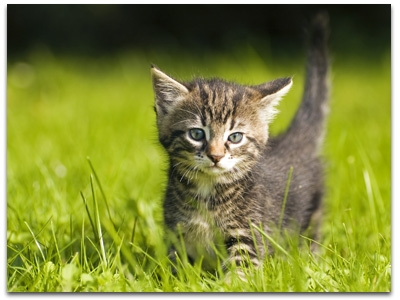

In [19]:
from IPython.display import Image
Image('cat.jpg')

Is our kitten recognized as a cat ?
Let's look at filters from the first layer.


-0.67140007 0.6085159


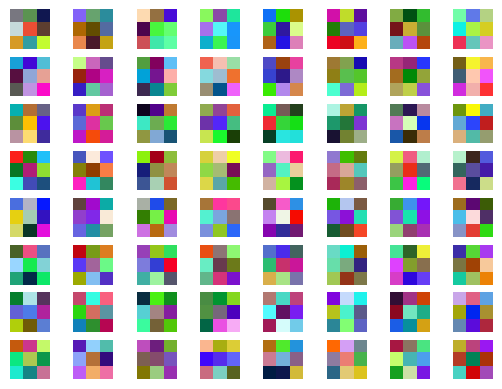

In [20]:
weights = model3.get_weights()
#for w in weights: print(w.shape)

# normalize values between 0 and 1
minimum, maximum = np.min(weights[0]), np.max(weights[0])
weights0 = (weights[0] - minimum) / (maximum - minimum)

print(minimum, maximum)
# entre 0 et 255 pour l'affichage
weights0 *= 255.

images = []
for i in range(64):
  images.append(np.array(255*weights0[:,:,:,i]).reshape(3,3,3).astype('uint8'))

show_images(images, 8)


Note that we disply filters in RGB and we could separate channels.
In any case this is not very informative.

Now we are going to generate an image that maximizes a given filter.

<h3> Visualization by maximization of activation</h3>
  
Tensorflow functions (Keras nbackend) allows us to define a function from an image to the activation of a given layer.
Maximizing this function through its gradient means that we built an artificial image to maximize a specific filter, thus building a pattern that maximizes this filter.

here are some useful functions

In [21]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x = np.array(x, dtype=np.float64)

    x -= x.mean()
    x /= (x.std() + 1e-5) # K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255

    return x.astype(np.uint8)

Defintion of a Keras function, geting the gradient, perform gradient ascen to maximize.


In [22]:
print(model3.summary())


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


222827.16


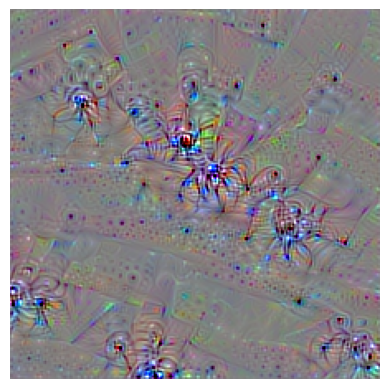

In [ ]:
# Choisir une couche et numéro de filtre à visualiser
num_layer =18 #18
num_filter = 30 #12

# Définit un submodel de l'entrée vers la couche visée
submodel = tf.keras.models.Model([model3.inputs[0]], [model3.layers[num_layer].output])

# Initialise une image aléatoire et cast en variable tf.float32
input_img_data = np.random.random((1, 224, 224, 3))
input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))

# Iterate gradient ascents
epochs = 500
step_size = 10.
for i in range(epochs):
    with tf.GradientTape() as tape:
        outputs = submodel(input_img_data)
        loss_value = tf.reduce_mean(outputs[:, :, :, num_filter])
    grads = tape.gradient(loss_value, input_img_data) # gradient of loss wrt inputs
    normalized_grads = grads / (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)
    input_img_data.assign_add(normalized_grads * step_size)

# Affichage de l'image obtenue
print(loss_value.numpy())
img = deprocess_image(input_img_data)
show_images(img)

<b> TODO : </b> vary the layers and filters and comment on your results. How can one get more complex figures ?

<h1> Training a deep network: augmentation</h1>

A deeper network like VGG has billions of parameters and can be complicated to train. Parameters must fit in the GPU RAM, as well as all the batch data.
On ImageNet image resolution is 255x255x3.

Moreover, one may not have a large data collection to learn from. Thus, there are several options:
- start from a pre-trained networks and fine-tune it.
- regularize the network weights (helpful, but not enough)
- artificially augment the number of data (often helpful).

Here we focus on data augmentation on MNIST.


In [24]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28
num_classes = 10
nb_samples = len(x_train)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Sélection aléatoire de 500/1000 exemples
l_idx = list(range(nb_samples))
np.random.shuffle(l_idx)
l_idx = l_idx[:1000]
x_train, y_train = x_train[l_idx], y_train[l_idx]

# conversion des étiquettes au format one-hot vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Architecture du modèle
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#print(model2.summary())

model2.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1)

score = model2.evaluate(x_test, y_test, verbose=0)
print("score=", score)

Epoch 1/20


c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.2038 - loss: 2.2403
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5990 - loss: 1.6790
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7283 - loss: 0.8643
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8127 - loss: 0.5949
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8792 - loss: 0.4300
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9123 - loss: 0.3029
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9262 - loss: 0.2591
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9415 - loss: 0.2013
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9543 - loss: 0.1452
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9691 - loss: 0.0984
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9687 - loss: 0.1093
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9653 - loss: 0.0901
Epoch 13/20


Performance can be improved by augmentation. Here we generate 20k data from 5k.



(128, 28, 28, 1) (128, 10)


c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.1582 - loss: 2.2690
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5385 - loss: 2.0299
Epoch 3/20


c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4975 - loss: 1.8023
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.6094 - loss: 1.2979
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6012 - loss: 1.1530
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7812 - loss: 0.7576
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7579 - loss: 0.7477
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.7812 - loss: 0.6186
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8240 - loss: 0.5408
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8906 - loss: 0.3856 
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8771 - loss: 0.4302
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9219 - loss: 0.2830
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8946 - loss: 0.3430
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9231 - loss: 0.3208
Epoch

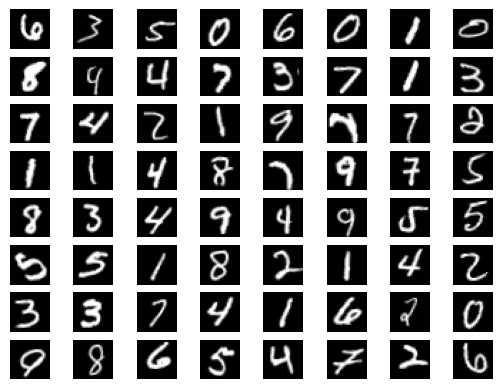

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# déclaration d'un générateur, qui transformera "à la volée" des données MNIST
datagen = ImageDataGenerator(
    #featurewise_center=False,
    #featurewise_std_normalization=False,
    rotation_range=10,
    zoom_range = 0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=False, # flip horizontal et vertical n'ont pas de sens pour des digits !
    vertical_flip=False
    )
datagen.fit(x_train)

# On instancie le générateur
flow = datagen.flow(x_train, y_train, batch_size=128, shuffle=True)

# Pour affichage : une itération du générateur
xx = next(flow)
print(xx[0].shape, xx[1].shape)

images = []
for i in range(64):
  images.append(np.array(255*xx[0][i,:,:,:]).reshape(28,28).astype('uint8'))
show_images(images, 8)


# réinitialisation du modèle
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# entrainement avec les données augmentées (à la volée)
model2.fit(datagen.flow(x_train, y_train, batch_size=128), steps_per_epoch=int(1000/128), epochs=20)



# évaluation
score = model2.evaluate(x_test, y_test, verbose=0)
print("score=", score)


<b>TO DO : </b> test other types and quantities of augmentations and see the impact on the network precision.

<b>TO DO : </b> modify the architecture for image classification on CIFAR 10 dataset.

In [38]:
#modify the architecture for image classification on CIFAR 10 dataset.

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols = 32, 32
num_classes = 10
nb_samples = len(x_train)
input_shape = (img_rows, img_cols, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255

x_test /= 255

# Sélection aléatoire de 500/1000 exemples
l_idx = list(range(nb_samples))
np.random.shuffle(l_idx)
l_idx = l_idx[:1000]
x_train, y_train = x_train[l_idx], y_train[l_idx]

# conversion des étiquettes au format one-hot vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Architecture du modèle
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#print(model2.summary())

model2.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1)

score = model2.evaluate(x_test, y_test, verbose=0)

print("score=", score)




170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


c:\Users\bausm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.1068 - loss: 2.3012
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.1846 - loss: 2.2175
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2600 - loss: 2.0335
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.2742 - loss: 2.0048
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3169 - loss: 1.9165
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.3662 - loss: 1.8511
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.3893 - loss: 1.7355
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4085 - loss: 1.6943
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4103 - loss: 1.6504
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4501 - loss: 1.5467
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4655 - loss: 1.5273
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4676 - loss: 1.503

In [ ]:
score= [1.6492449045181274, 0.4296000003814697] #sans augmentation



In [2]:
#is tensorflow using gpu?

import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.18.0
[]
